In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import torch
import matplotlib.pyplot as plt

ImportError: cannot import name 'is_categorical' from 'pandas.api.types' (/media/gambino/students_workdir/anna/miniconda3/envs/ak3/lib/python3.9/site-packages/pandas/api/types/__init__.py)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
adata = sc.read_h5ad("data/Immune_ALL_human.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 33506 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    layers: 'counts'

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [10]:
sc.tl.pca(adata, svd_solver='arpack')

In [11]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


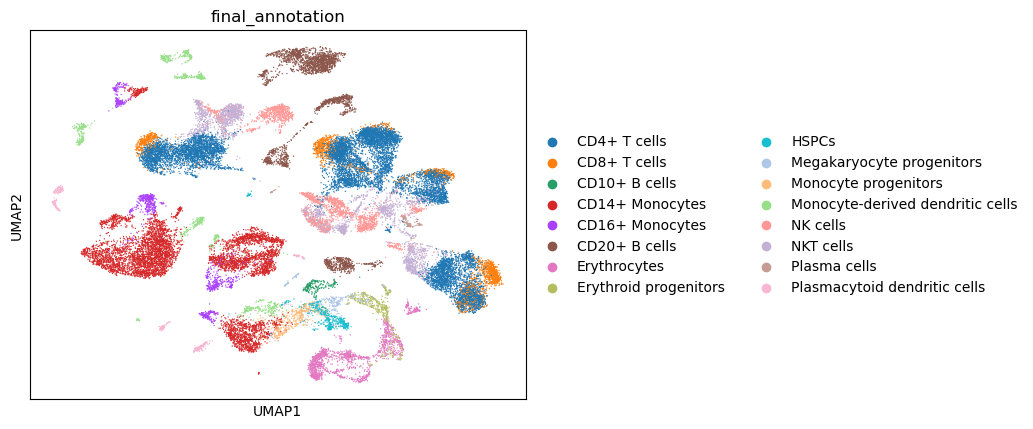

In [12]:
sc.pl.umap(adata, color='final_annotation', palette=sc.pl.palettes.vega_20_scanpy)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


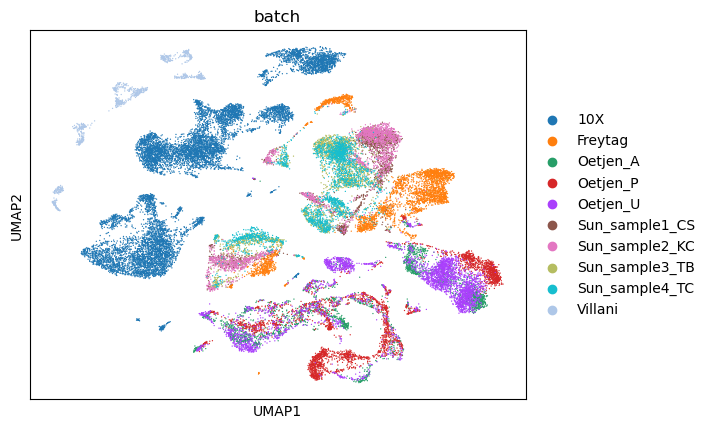

In [13]:
sc.pl.umap(adata, color='batch', palette=sc.pl.palettes.vega_20_scanpy)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


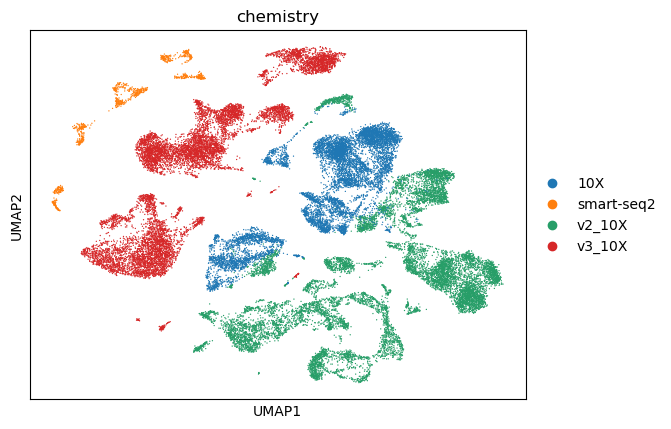

In [14]:
sc.pl.umap(adata, color='chemistry', palette=sc.pl.palettes.vega_20_scanpy)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


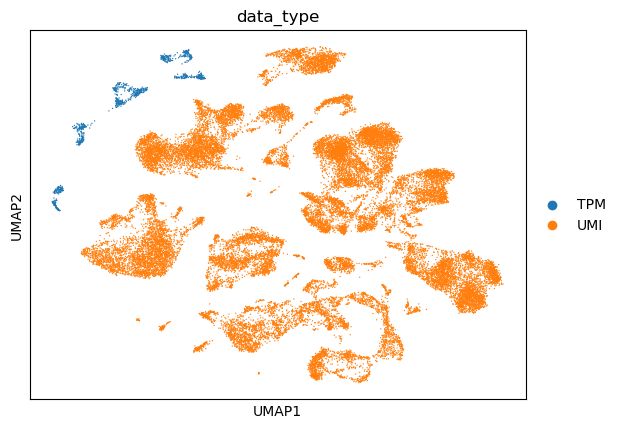

In [15]:
sc.pl.umap(adata, color='data_type', palette=sc.pl.palettes.vega_20_scanpy)

loss = MSE + 0.1 * sum(1/LISI)

In [35]:
from src.types import TrainParams

train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="benchmark_human_immune")

In [36]:
from src.vae.model import VAE
from src.model import ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)

model = VAE(adata, model_params)

In [19]:
from src.vae.train import train_vae
torch.autograd.set_detect_anomaly(False)

hist = train_vae(model, adata, batch_key="batch", params=train_params)

/media/gambino/students_workdir/anna/OtF-prostate/src/vae/dataloader.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[BATCH_KEY] = pd.Categorical(pd.factorize(adata.obs.loc[:, batch_key])[0])
/media/gambino/students_workdir/anna/OtF-prostate/src/vae/dataloader.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[BATCH_KEY] = pd.Categorical(pd.factorize(adata.obs.loc[:, batch_key])[0])
  4%|█▎                             | 9/210 [00:11<04:06,  1.22s/it]


AssertionError: NaN in parameters

100%|█████████████████████████████| 262/262 [00:17<00:00, 15.10it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = 

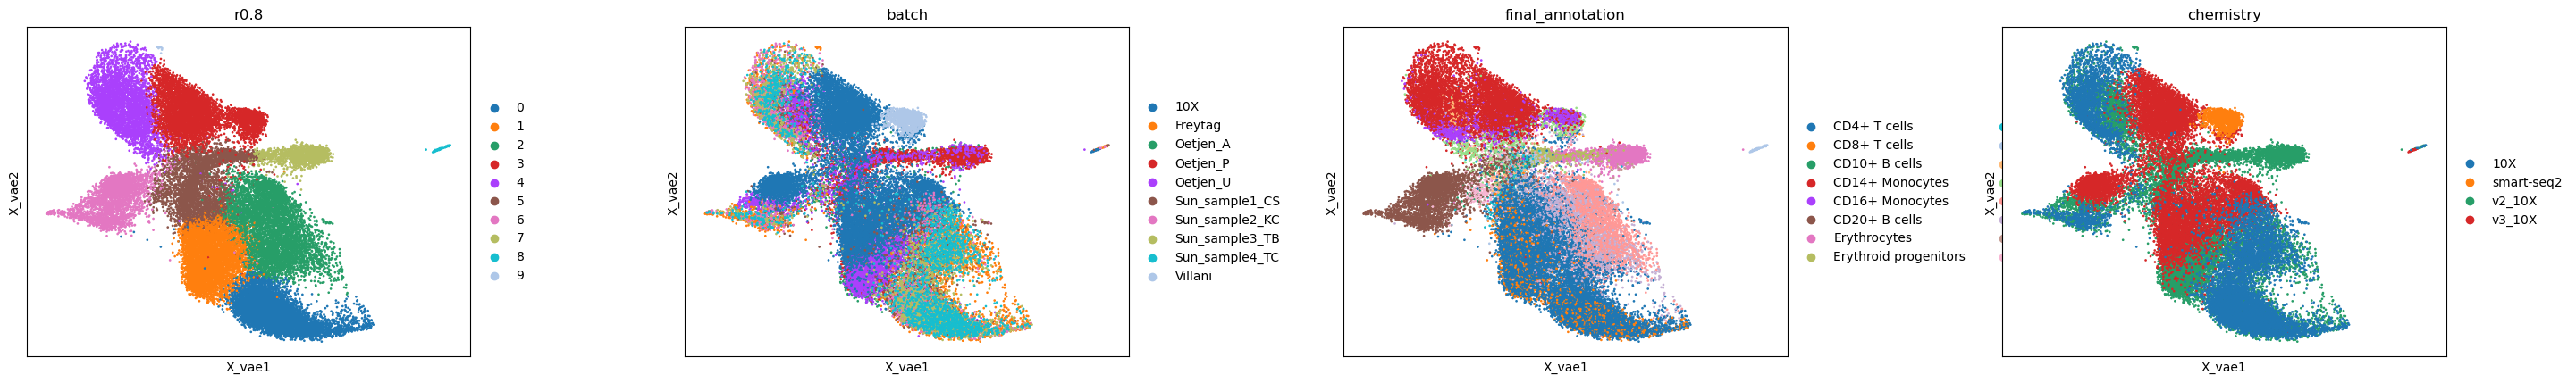

In [68]:
from src.vae.diagnostics import plot_embedding

model_dict = torch.load('mvae_params/benchmark_human_immune_0.1_20230403-233946.pt', map_location='cuda')
model.load_state_dict(model_dict)

plot_embedding(model, adata, keys=["batch", "final_annotation", "chemistry"], batch_key="batch", train_params=train_params)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


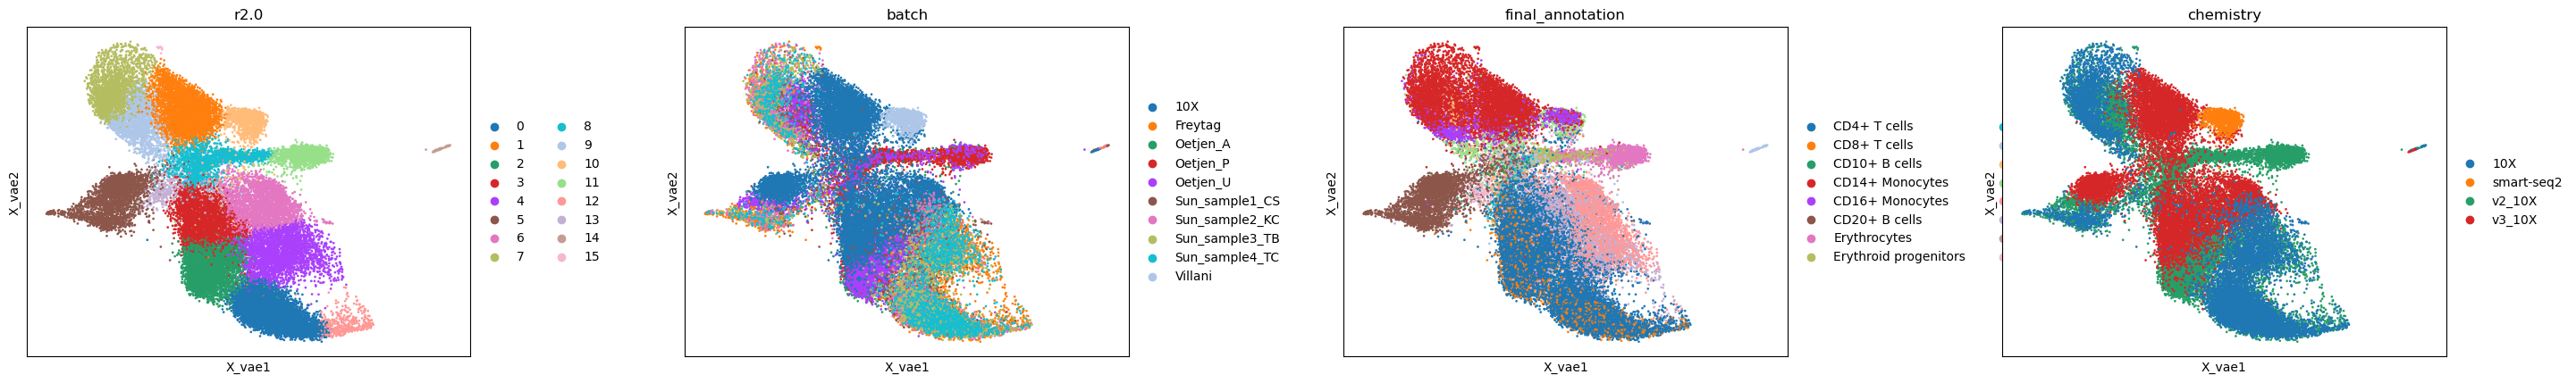

In [70]:
sc.tl.leiden(adata, resolution=2.0, key_added=f"r2.0")

sc.pl.embedding(
    adata,
    "X_vae",
    color=[f"r2.0", "batch", "final_annotation", "chemistry"],
    size=15,
    wspace=0.35,
)

(MNN) loss = MSE + 0.01 * sum(1/LISI(batch))

In [38]:
from src.types import TrainParams

train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="benchmark_human_immune_0.6")

In [41]:
from src.vae.model import VAE
from src.model import ModelParams

model_params = ModelParams(beta=0.001, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)

model = VAE(adata, model_params)

In [ ]:
from src.vae.train import train_vae
torch.autograd.set_detect_anomaly(False)

hist = train_vae(model, adata, batch_keys=["batch"], params=train_params)

# model_dict = torch.load('mvae_params/benchmark_human_immune_0.6_20230409-194249.pt', map_location='cuda')
# model.load_state_dict(model_dict)

100%|█████████████████████████████████████████| 419/419 [02:14<00:00,  3.10it/s]

EarlyStopping (epoch: 1): train loss improved to 0.5354642321540071



100%|█████████████████████████████████████████| 105/105 [00:27<00:00,  3.83it/s]

EarlyStopping (epoch: 1): valid loss improved to 27.010931977771577



100%|█████████████████████████████████████████| 419/419 [02:16<00:00,  3.07it/s]

EarlyStopping (epoch: 2): train loss improved to 0.3429030280133856



100%|█████████████████████████████████████████| 105/105 [00:26<00:00,  3.94it/s]

EarlyStopping (epoch: 2): valid loss improved to 19.764960080101375



100%|█████████████████████████████████████████| 419/419 [02:15<00:00,  3.09it/s]

EarlyStopping (epoch: 3): train loss improved to 0.26409518688476863



  0%|                                                   | 0/105 [00:00<?, ?it/s]Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/queu

  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/resource_sharer.py", line 76, in register
    self._start()
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/connection.py", line 442, in __init__
    address = address or arbitrary_address(family)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/resource_sharer.py", line 126, in _start
    self._listener = Listener(authkey=process.current_process().authkey)
OSError: [Errno 28] No space left on device: '/tmp/pymp-ztos66qd'
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/torch/multiprocessing/reductions.py", line 348, in reduce_storage
    df = multiprocessing.reduction.DupFd(fd)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/connection.py", line 76, in arbitrary_address
    return tempfile.mktemp(prefix='listener-',

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
Traceback (most recent call last):
  File "/media/gambino/students_workdir/anna/miniconda

Traceback (most recent call last):
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/torch/multiprocessing/reductions.py", line 348, in reduce_storage
    df = multiprocessing.reduction.DupFd(fd)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/reduction.py", line 198, in DupFd
    return resource_sharer.DupFd(fd)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multiprocessing/resource_sharer.py", line 53, in __init__
    self._id = _resource_sharer.register(send, close)
  File "/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/multipr

100%|█████████████████████████████████████████| 131/131 [00:18<00:00,  7.01it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be igno

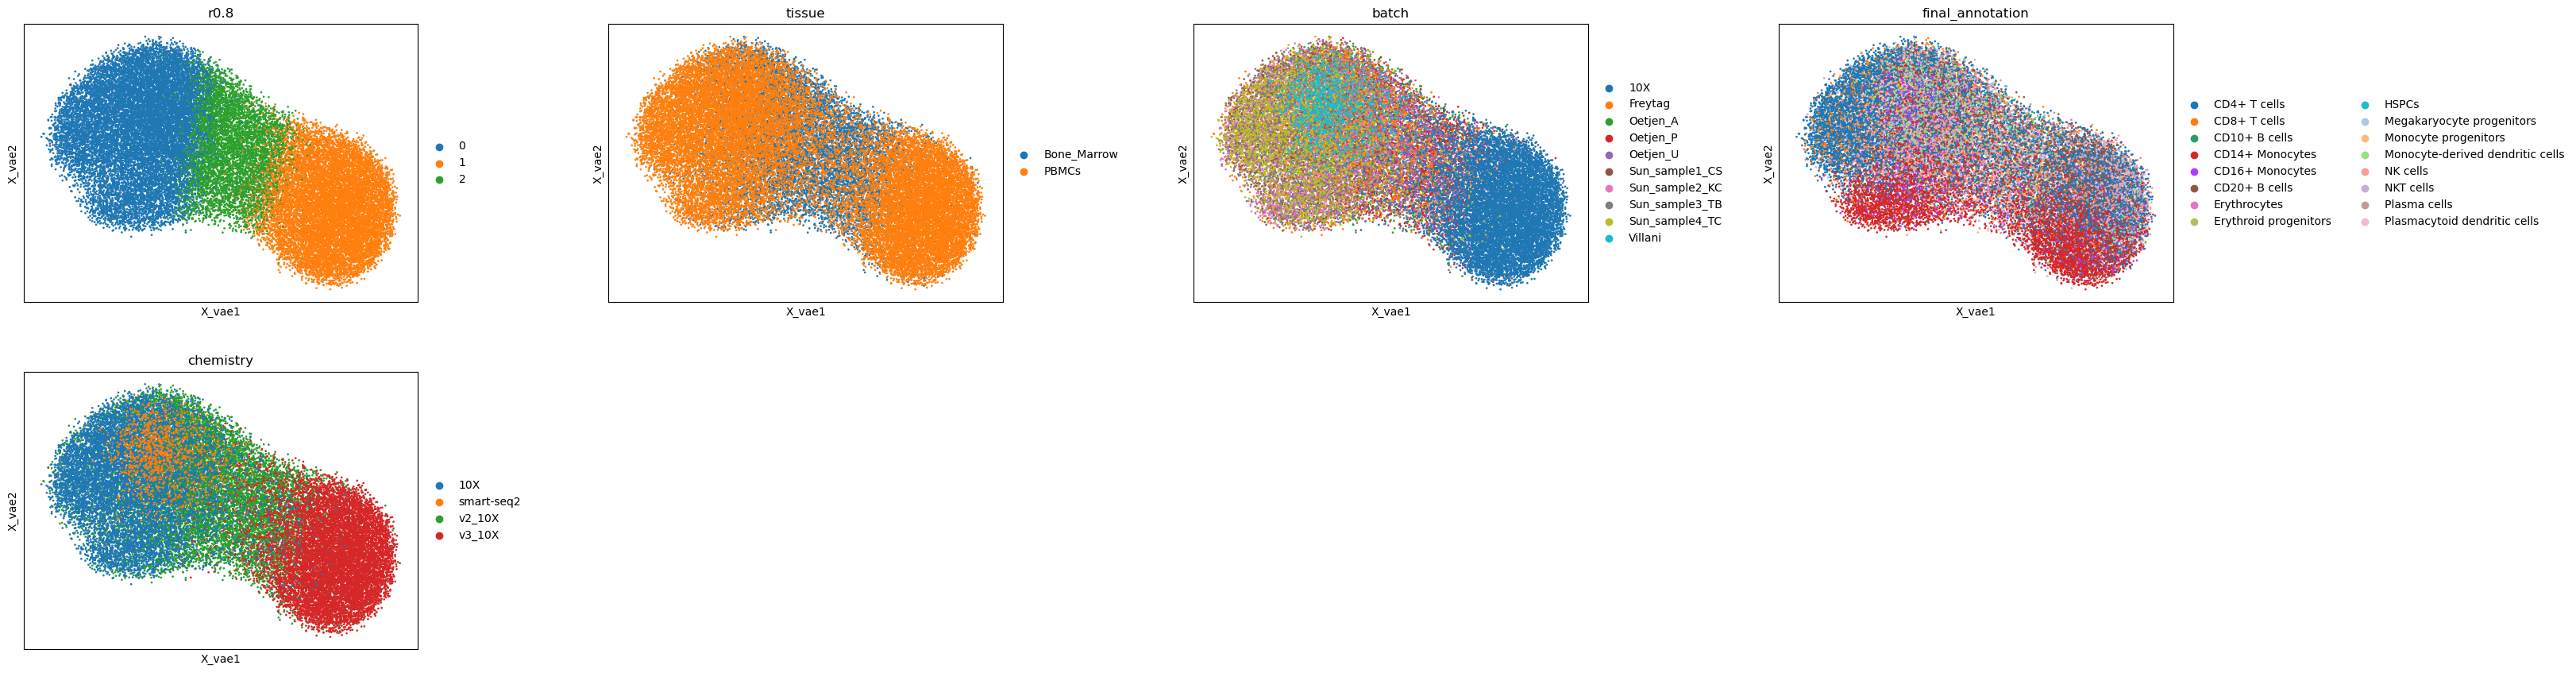

In [26]:
from src.vae.diagnostics import plot_embedding

plot_embedding(model, adata, keys=["tissue", "batch", "final_annotation", "chemistry"], batch_keys=["batch"], train_params=train_params)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


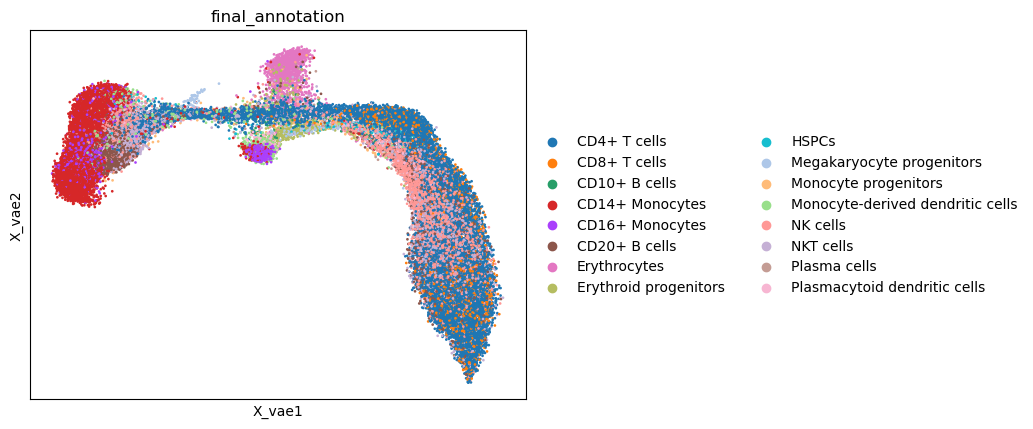

In [11]:
sc.pl.embedding(
    adata,
    "X_vae",
    color=["final_annotation"],
    size=15,
    wspace=0.35,
)

In [59]:
torch.zeros((2,3)).view(-1)

tensor([0., 0., 0., 0., 0., 0.])

In [33]:
torch.log(torch.tensor(0)) + 2.0 / torch.tensor(0)

tensor(nan)